<a href="https://colab.research.google.com/github/saktheeswaranswan/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/blob/main/fea_anna_university_check_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/saktheeswaranswan/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix.git

Cloning into 'Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix'...
remote: Enumerating objects: 84, done.
remote: Total 84 (delta 0), reused 0 (delta 0), pack-reused 84 (from 1)
Receiving objects: 100% (84/84), 51.89 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (95/95), done.


<ipython-input-2-15d24ce68a88>:322: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  EQ_STRESS[elem] = V


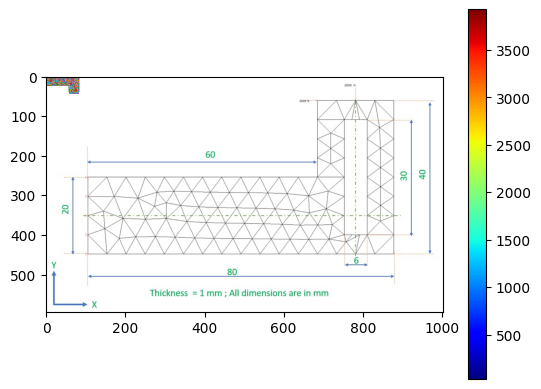

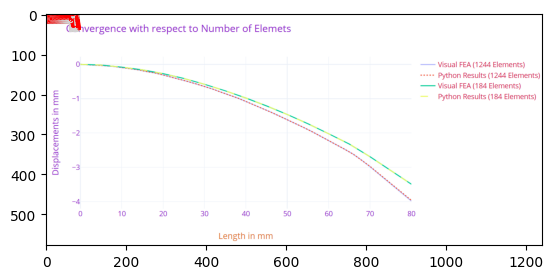

In [2]:
#Text cell <undefined>
# %% [markdown]
# ME5204 Finite Element Analysis
## Project 2D Plane Stress Problems
### SENTHILKUMAR R (ME22M016)

# %% [code]
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Text cell <undefined>
# %% [markdown]
#### Problem Definition

#Code cell <undefined>
# %% [code]
img = Image.open('/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/problem_definition.png')
plt.imshow(img)



# %% [markdown]
#### Analysis Input


# %% [code]
Num_Nodes, Num_Elems, Num_Mats, Prob_Type, Thickness = np.loadtxt("/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/input.txt").astype(np.float32)

Num_Nodes, Num_Elems, Num_Mats, Prob_Type = int(Num_Nodes), int(Num_Elems), int(Num_Mats), int(Prob_Type)


# %% [markdown]
#### Nodal Co-ordinate and Array


# %% [code]
COORD = np.loadtxt("/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/COORD.txt").astype(np.float32)

# %% [code]
NCA = np.loadtxt("/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/NCA.txt").astype(np.int32)
#print(NCA)


# %% [markdown]
#### Material Property


# %% [code]
MAT = np.loadtxt("/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/MAT.txt").astype(np.float32)
#print(MAT)

# %% [markdown]
#### Equivalent Nodal Forces

# %% [code]
LOAD_BC = np.loadtxt("/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/LOAD_BC.txt").astype(np.float32)


# %% [markdown]
#### Boundary Conditions


# %% [code]
DISP_BC = np.loadtxt("/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/DISP_BC.txt").astype(np.float32)


# %% [markdown]
#### Input Verification and Plot

# %% [code]
X = np.zeros([Num_Elems, 4])
Y = np.zeros([Num_Elems, 4])
CGX = np.zeros([Num_Elems, 1])
CGY = np.zeros([Num_Elems, 1])

for elem in range(1, Num_Elems+1,1):
    N1 = NCA[elem,3]
    N2 = NCA[elem,2]
    N3 = NCA[elem,1]
    X1N1 = COORD[N1,1]
    X2N1 = COORD[N1,2]
    X1N2 = COORD[N2,1]
    X2N2 = COORD[N2,2]
    X1N3 = COORD[N3,1]
    X2N3 = COORD[N3,2]
    Mat_Num = NCA[elem,4]
    X = [X1N1,X1N2,X1N3,X1N1]
    Y = [X2N1,X2N2,X2N3,X2N1]
    CGX[elem - 1] = (X1N1+X1N2+X1N3)/3.0
    CGY[elem - 1] = (X2N1+X2N2+X2N3)/3.0
    plt.plot(X, Y)
#     plt.scatter(X, Y)
    #plt.text(CGX[elem-1],CGY[elem-1],str(elem),bbox = dict(facecolor = 'white', alpha = 0.5))
    match NCA[elem , 4]:
        case 1:
            plt.fill(X, Y, color = 'red')
        case 2:
            plt.fill(X, Y, color = 'green')

#### Element Stiffness matrix and Assembly of Golbal Stiffness matrix


# %% [code]
DOF_PN = 2
Total_DOF = Num_Nodes*DOF_PN
GSTIFF = np.zeros((Total_DOF,Total_DOF))
F = np.zeros((Total_DOF,1))

for elem in range(1, Num_Elems+1,1):
    N1 = NCA[elem,3]
    N2 = NCA[elem,2]
    N3 = NCA[elem,1]
    X1N1 = COORD[N1,1]
    X2N1 = COORD[N1,2]
    X1N2 = COORD[N2,1]
    X2N2 = COORD[N2,2]
    X1N3 = COORD[N3,1]
    X2N3 = COORD[N3,2]
    Two_Delta_matrix= np.array([[1, X1N1, X2N1],
                           [1, X1N2, X2N2],
                           [1, X1N3, X2N3]])
    Two_Delta = np.linalg.det(Two_Delta_matrix)
    Num_Nodes_PE = 3
    B = np.zeros((Num_Nodes_PE,Num_Nodes_PE*DOF_PN))
    B1 = (X2N2 - X2N3)
    B2 = (X2N3 - X2N1)
    B3 = (X2N1 - X2N2)
    G1 = (X1N3 - X1N2)
    G2 = (X1N1 - X1N3)
    G3 = (X1N2 - X1N1)
    B[0,0] = B1/Two_Delta
    B[0,2] = B2/Two_Delta
    B[0,4] = B3/Two_Delta
    B[1,1] = G1/Two_Delta
    B[1,3] = G2/Two_Delta
    B[1,5] = G3/Two_Delta
    B[2,0] = G1/Two_Delta
    B[2,1] = B1/Two_Delta
    B[2,2] = G2/Two_Delta
    B[2,3] = B2/Two_Delta
    B[2,4] = G3/Two_Delta
    B[2,5] = B3/Two_Delta
    Two_Delta_2 = np.linalg.det(Two_Delta_matrix)
    Mat_Num = NCA[elem,4]
    match Mat_Num:
        case 1:
            E = MAT[Mat_Num,1]
            PR = MAT[Mat_Num,2]
        case 2:
            E = MAT[Mat_Num,1]
            PR = MAT[Mat_Num,2]
    D = np.zeros((Num_Nodes_PE,Num_Nodes_PE))
    match Prob_Type:
        case 21:
            CONST = E/(1-PR**2)
            D[0,0] = 1*CONST
            D[0,1] = PR*CONST
            D[0,2] = 0*CONST
            D[1,0] = PR*CONST
            D[1,1] = 1*CONST
            D[1,2] = 0*CONST
            D[2,0] = 0*CONST
            D[2,1] = 0*CONST
            D[2,2] = 0.5*(1-PR)*CONST
        case 22:
            CONST = E/((1+PR)*(1-2*PR))
            D[0,0] = (1-PR)*CONST
            D[0,1] = PR*CONST
            D[0,2] = 0*CONST
            D[1,0] = PR*CONST
            D[1,1] = (1-PR)*CONST
            D[1,2] = 0*CONST
            D[2,0] = 0*CONST
            D[2,1] = 0*CONST
            D[2,2] = 0.5*(1-2*PR)*CONST
    ESTIFF = B.transpose()@D@B*Thickness*0.5*Two_Delta
    CN = [2*N1-2, 2*N1-1, 2*N2-2, 2*N2-1,2*N3-2, 2*N3-1]
    CN_IDX = np.array(6*CN).reshape(6,6)
    RO_IDX = CN_IDX.transpose()
    GSTIFF[RO_IDX,CN_IDX] = GSTIFF[RO_IDX,CN_IDX]+ESTIFF


# %% [markdown]
#### Force Matrix

# %% [code]
Num_load = 2
F = np.zeros((Total_DOF,1))

for i in range(1, Num_load+1,1):
    LOAD_TYPE = int(LOAD_BC[i,2])
    match LOAD_TYPE:
        case 1:
            N = int(LOAD_BC[i,1])
            F[2*N-2,0] = F[2*N-2,0]+ LOAD_BC[i,3]
        case 2:
            N = int(LOAD_BC[i,1])
            F[2*N-1,0] = F[2*N-1,0]+ LOAD_BC[i,4]
        case 12:
            N = int(LOAD_BC[i,1])
            F[2*N-2,0] = F[2*N-2,0]+ LOAD_BC[i,3]
            F[2*N-1,0] = F[2*N-1,0]+ LOAD_BC[i,4]


# %% [markdown]
#### Solve [K] {u} = {F} and find Displacement {u}


# %% [code]
GSTIFFCOPY = GSTIFF.copy()
Num_Disp_BC = 11
for i in range(1,Num_Disp_BC+1,1):
    DISP_TYPE = int(DISP_BC[i,2])
    match DISP_TYPE:
        case 1:
            N = int(DISP_BC[i,1])
            F[2*N-2,0] = F[2*N-2,0]+ DISP_BC[i,3]*10**32
            GSTIFFCOPY[2*N-2,2*N-2] = GSTIFFCOPY[2*N-2,2*N-2]+10**32
        case 2:
            N = int(DISP_BC[i,1])
            F[2*N-1,0] = F[2*N-1,0]+ DISP_BC[i,4]*10**32
            GSTIFFCOPY[2*N-1,2*N-1] = GSTIFFCOPY[2*N-1,2*N-1]+10**32
        case 12:
            N = int(DISP_BC[i,1])
            F[2*N-2,0] = F[2*N-2,0]+ DISP_BC[i,3]*10**32
            GSTIFFCOPY[2*N-2,2*N-2] = GSTIFFCOPY[2*N-2,2*N-2]+10**32
            F[2*N-1,0] = F[2*N-1,0]+ DISP_BC[i,4]*10**32
            GSTIFFCOPY[2*N-1,2*N-1] = GSTIFFCOPY[2*N-1,2*N-1]+10**32


# %% [code]
DISP = np.linalg.solve(GSTIFFCOPY,F)
DISP_XY = DISP.reshape(-1, 2)
DISP_XY
np.savetxt('./DISPOUT',DISP_XY)


# %% [markdown]
#### Equivalent Stress (Von-Mises Stress) Plot

# %% [code]
EQ_STRESS = np.zeros(Num_Elems+1)
for elem in range(1, Num_Elems+1,1):
    N1 = NCA[elem,3]
    N2 = NCA[elem,2]
    N3 = NCA[elem,1]
    X1N1 = COORD[N1,1]
    X2N1 = COORD[N1,2]
    X1N2 = COORD[N2,1]
    X2N2 = COORD[N2,2]
    X1N3 = COORD[N3,1]
    X2N3 = COORD[N3,2]
    Two_Delta_matrix= np.array([[1, X1N1, X2N1],
                           [1, X1N2, X2N2],
                           [1, X1N3, X2N3]])
    Two_Delta = np.linalg.det(Two_Delta_matrix)
    Num_Nodes_PE = 3
    B = np.zeros((Num_Nodes_PE,Num_Nodes_PE*DOF_PN))
    B1 = (X2N2 - X2N3)
    B2 = (X2N3 - X2N1)
    B3 = (X2N1 - X2N2)
    G1 = (X1N3 - X1N2)
    G2 = (X1N1 - X1N3)
    G3 = (X1N2 - X1N1)
    B[0,0] = B1/Two_Delta
    B[0,2] = B2/Two_Delta
    B[0,4] = B3/Two_Delta
    B[1,1] = G1/Two_Delta
    B[1,3] = G2/Two_Delta
    B[1,5] = G3/Two_Delta
    B[2,0] = G1/Two_Delta
    B[2,1] = B1/Two_Delta
    B[2,2] = G2/Two_Delta
    B[2,3] = B2/Two_Delta
    B[2,4] = G3/Two_Delta
    B[2,5] = B3/Two_Delta
    Two_Delta_2 = np.linalg.det(Two_Delta_matrix)
    Mat_Num = NCA[elem,4]
    match Mat_Num:
        case 1:
            E = MAT[Mat_Num,1]
            PR = MAT[Mat_Num,2]
        case 2:
            E = MAT[Mat_Num,1]
            PR = MAT[Mat_Num,2]
    D = np.zeros((Num_Nodes_PE,Num_Nodes_PE))
    match Prob_Type:
        case 21:
            CONST = E/(1-PR**2)
            D[0,0] = 1*CONST
            D[0,1] = PR*CONST
            D[0,2] = 0*CONST
            D[1,0] = PR*CONST
            D[1,1] = 1*CONST
            D[1,2] = 0*CONST
            D[2,0] = 0*CONST
            D[2,1] = 0*CONST
            D[2,2] = 0.5*(1-PR)*CONST
        case 22:
            CONST = E/((1+PR)*(1-2*PR))
            D[0,0] = (1-PR)*CONST
            D[0,1] = PR*CONST
            D[0,2] = 0*CONST
            D[1,0] = PR*CONST
            D[1,1] = (1-PR)*CONST
            D[1,2] = 0*CONST
            D[2,0] = 0*CONST
            D[2,1] = 0*CONST
            D[2,2] = 0.5*(1-2*PR)*CONST
    CN = [2*N1-2, 2*N1-1, 2*N2-2, 2*N2-1,2*N3-2, 2*N3-1]
    u = DISP[CN]
    STRAIN = B@u
    STRESS = D@STRAIN
    STRESS = STRESS.reshape(-1,3)
    STRESS_XX = STRESS[:,0]
    STRESS_YY = STRESS[:,1]
    STRESS_XY = STRESS[:,2]
    V = np.sqrt((STRESS_XX**2-(STRESS_XX*STRESS_YY))+(STRESS_YY**2)+(3*(STRESS_XY**2)))

    EQ_STRESS[elem] = V

XCOORD = COORD[1:, 1]
YCOORD = COORD[1:, 2]
ELEM_CON = NCA[1:,1:-1]-1
VonMises = EQ_STRESS[1:]
plt.tripcolor(XCOORD, YCOORD, ELEM_CON, VonMises, cmap='jet')
plt.colorbar()
plt.show()



COORD_NEW = COORD[1:, [1,2]] + DISP_XY
for elem in range(1, Num_Elems+1,1):
    N1 = NCA[elem,3]
    N2 = NCA[elem,2]
    N3 = NCA[elem,1]

    X1N1 = COORD[N1,1]
    X2N1 = COORD[N1,2]
    X1N2 = COORD[N2,1]
    X2N2 = COORD[N2,2]
    X1N3 = COORD[N3,1]
    X2N3 = COORD[N3,2]

    X = [X1N1,X1N2,X1N3,X1N1]
    Y = [X2N1,X2N2,X2N3,X2N1]

    plt.plot(X, Y,  color='lightgrey')

    X1N1_NEW = COORD_NEW[N1-1,0]
    X2N1_NEW = COORD_NEW[N1-1,1]
    X1N2_NEW = COORD_NEW[N2-1,0]
    X2N2_NEW = COORD_NEW[N2-1,1]
    X1N3_NEW = COORD_NEW[N3-1,0]
    X2N3_NEW = COORD_NEW[N3-1,1]
    Mat_Num = NCA[elem, 4]
    X = [X1N1_NEW,X1N2_NEW,X1N3_NEW,X1N1_NEW]
    Y = [X2N1_NEW,X2N2_NEW,X2N3_NEW,X2N1_NEW]

    plt.plot(X, Y,  color='red')


img2 = Image.open('/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/Python unaltered/Convergence.png')
plt.imshow(img2)







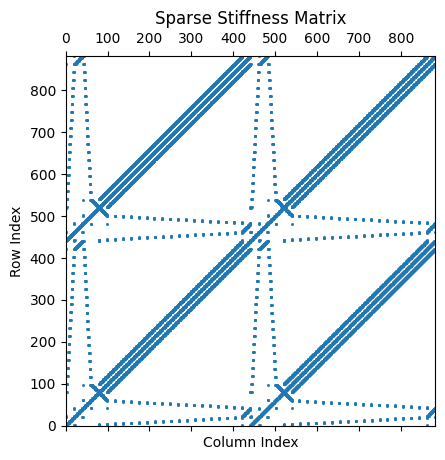

In [3]:
# -*- coding: utf-8 -*-
"""fem assembly sparse matrix august 2023 newfff.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1nTv0Ilm_kdFskWdqCo4cDIkwbKTYcp-Y
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define tolerance
tol = 1e-6
# %matplotlib inline
def solution(nDof,fixDof,K,force):
    activeDof = np.setdiff1d(np.arange(nDof), fixDof)
    U = np.linalg.solve(K[np.ix_(activeDof,activeDof)],force[activeDof])
    disp = np.zeros((nDof,1))
    disp[activeDof] = U
    return disp
def shapeFuncQ4(xi,eta):
    shape = np.zeros((4,1))
    shape[:,0] = 1/4*np.array([(1-xi)*(1-eta),(1+xi)*(1-eta),(1+xi)*(1+eta),(1-xi)*(1+eta)])
    nderiv = np.zeros((4,2))
    nderiv[0,:] = 1/4*np.array([-(1-eta),-(1-xi)])
    nderiv[1,:] = 1/4*np.array([1-eta,-(1+xi)])
    nderiv[2,:] = 1/4*np.array([1+eta,1+xi])
    nderiv[3,:] = 1/4*np.array([-(1+eta),1-xi])
    return shape, nderiv
def Jacobian(nodeCoord,nderiv):
    J = np.matmul(np.transpose(nodeCoord),nderiv)
    bT = np.transpose(nderiv)
    aT = J.T
    xT = np.linalg.solve(aT,bT)
    xyDeriv = np.transpose(xT)
    return J, xyDeriv
def gaussQuadrature(option):
    if option == 1: # full integration
        locations = np.array([[-0.577350269189626, -0.577350269189626],
                              [0.577350269189626, -0.577350269189626],
                              [0.577350269189626,  0.577350269189626],
                              [-0.577350269189626, 0.577350269189626]])
        weights = np.ones((4,1))
    else:
        locations =np.zeros((1,2))
        weights = 4
    return weights,locations
def formStiffness2D(nDof,nE,eNodes,nP,xy,C,h):
    K = np.zeros((nDof,nDof))
    gaussWt, gaussLoc = gaussQuadrature(1)
    for e in range(nE):
        id = eNodes[e,:]
        eDof = np.zeros((8,1))
        eDof[0:4,0] = id
        eDof[4:8,0] = id + nP
        eDof = eDof.flatten()

        ndof = id.size
        # loop for Gauss point
        for q in range(gaussWt.size):

            GaussPoint = gaussLoc[q,:]
            xi = GaussPoint[0]
            eta = GaussPoint[1]

            # shape functions and derivatives
            shape,nDeriv = shapeFuncQ4(xi,eta)

            # Jacobian matrix, inverse of Jacobian
            J,xyDeriv = Jacobian(xy[id-1,:],nDeriv)

            # B matrix (Linear strain - displacement matrix)
            B = np.zeros((3,2*ndof))
            B[0,0:ndof]      = np.transpose(xyDeriv[:,0])
            B[1,ndof:(2*ndof)] = np.transpose(xyDeriv[:,1])
            B[2,0:ndof]      = np.transpose(xyDeriv[:,1])
            B[2,ndof:(2*ndof)] = np.transpose(xyDeriv[:,0])

            # stiffness matrix
            BT = np.transpose(B)
            detJ = np.linalg.det(J)
            Ke = np.matmul(np.matmul(BT,C),B)*h*detJ*gaussWt[q]
            for ii in range(np.size(Ke,0)):
                row = int(eDof[ii])-1
                for jj in range(np.size(Ke,1)):
                    col = int(eDof[jj])-1
                    K[row,col] = K[row,col] + Ke[ii,jj]
    return K
def PlotMesha(xy,eNodes,nel):
    nnel = np.size(eNodes,1)
    X = np.zeros((nnel,nel))
    Y = np.zeros((nnel,nel))

    for iel in range(nel):
        for i in range(nnel):
            ndi = eNodes[iel,i]
            X[i,iel] = xy[ndi,0]
            Y[i,iel] = xy[ndi,1]

    plt.figure(figsize=(8, 8))
    plt.axis('equal')
    plt.fill(X, Y, facecolor='none', edgecolor='purple', linewidth=1)
    plt.show()
def PlotMeshb(xy,eNodes,nel):
    nnel = np.size(eNodes,1)
    X = np.zeros((nnel,nel))
    Y = np.zeros((nnel,nel))

    for iel in range(nel):
        for i in range(nnel):
            ndi = eNodes[iel,i]
            X[i,iel] = xy[ndi-1,0]
            Y[i,iel] = xy[ndi-1,1]
E = 2e11
h = 0.01
pois = 0.3
Lx = 1
Ly = 1
E1 =E/(1-pois**2)
C = E1*np.array([[1,     pois,   0],
                 [pois,   1,     0],
                 [0,      0,   (1-pois)/2]])
dfnode = pd.read_csv('/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/NLIST1.csv', header=None)
dfnode.head()
dfnode = dfnode.dropna(axis=0)
dfnode.head()
dfnode1 = dfnode[dfnode[0].isin(["NODE"])]
dfnode = pd.concat([dfnode, dfnode1, dfnode1]).drop_duplicates(keep=False)
dfnode.head()
nP = dfnode.count(axis=0)
nP = nP[0]
nDof = 2*nP
xy = dfnode.iloc[:,1:3]
xy = xy.reset_index()
xy = xy.iloc[:,1:3]
xy = xy.to_numpy(dtype=np.float32)
dfeNode = pd.read_csv('/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/ELIST1.csv', header=None)
dfeNode = dfeNode.dropna(axis=0)
dfeNode = dfeNode[[6,7,8,9]]
eNodes = dfeNode[[6,7,8,9]]
nE = eNodes.count(axis=0)
nE = nE[6]
eNodes.head()
eNodes = eNodes.astype(int)
eNodes = eNodes.to_numpy(dtype=np.int32)
eNodes.shape
PlotMeshb(xy,eNodes,nE)
K = formStiffness2D(nDof,nE,eNodes,nP,xy,C,h)
K.shape
fixP = np.argwhere(xy[:,0]<=tol)
fixDof = np.array([fixP,fixP+nP],order = 'F')
fixDof = fixDof.flatten()
fixDof
dfx = 1e8
dx = 1/20
dy = 1/20
force = np.zeros((nDof,1))
loadP1 = np.where((xy[:,0]>=Lx-tol) & (xy[:,1]>=Ly-tol))
loadP2 = np.where((xy[:,0]>=Lx-tol) & (xy[:,1]<=tol))
loadP3 = np.where((xy[:,0]>=Lx-tol) & (xy[:,1]>=tol) & (xy[:,1]<=Ly-tol))
force[loadP1,0] = dfx*dy/2
force[loadP2,0] = dfx*dy/2
force[loadP3,0] = dfx*dy
disp = solution(nDof,fixDof,K,force)
dispu = disp[0:nP,0]
dispv = disp[nP:2*nP,0]
max(dispu)
max(dispv)
min(dispv)

import numpy as np, pandas as pd, matplotlib.pyplot as plt
def sol(nDof, fixDof, K, force):
    ad = np.setdiff1d(np.arange(nDof), fixDof)
    U = np.linalg.solve(K[np.ix_(ad, ad)], force[ad])
    d = np.zeros((nDof, 1))
    d[ad] = U
    return d
def sf(xi, eta):
    s = np.zeros((4, 1))
    s[:, 0] = 1/4 * np.array([(1 - xi)*(1 - eta), (1 + xi)*(1 - eta), (1 + xi)*(1 + eta), (1 - xi)*(1 + eta)])
    nd = np.zeros((4, 2))
    nd[0, :] = 1/4 * np.array([-(1 - eta), -(1 - xi)])
    nd[1, :] = 1/4 * np.array([1 - eta, -(1 + xi)])
    nd[2, :] = 1/4 * np.array([1 + eta, 1 + xi])
    nd[3, :] = 1/4 * np.array([-(1 + eta), 1 - xi])
    return s, nd
def J(nc, nd):
    j = np.matmul(np.transpose(nc), nd)
    bt = np.transpose(nd)
    at = j.T
    xt = np.linalg.solve(at, bt)
    xyd = np.transpose(xt)
    return j, xyd
def gq(o):
    if o == 1:
        l = np.array([[-0.577350269189626, -0.577350269189626],[0.577350269189626, -0.577350269189626],[0.577350269189626,  0.577350269189626],[-0.577350269189626, 0.577350269189626]])
        w = np.ones((4, 1))
    else:
        l = np.zeros((1, 2))
        w = 4
    return w, l

# -*- coding: utf-8 -*-
"""Untitled80.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1uXpyQRKM1yyJ5BY-NlDbNrUJaUrvD4KA
"""

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define tolerance
tol = 1e-6
# %matplotlib inline
def solution(nDof,fixDof,K,force):
    activeDof = np.setdiff1d(np.arange(nDof), fixDof)
    U = np.linalg.solve(K[np.ix_(activeDof,activeDof)],force[activeDof])
    disp = np.zeros((nDof,1))
    disp[activeDof] = U
    return disp
def shapeFuncQ4(xi,eta):
    shape = np.zeros((4,1))
    shape[:,0] = 1/4*np.array([(1-xi)*(1-eta),(1+xi)*(1-eta),(1+xi)*(1+eta),(1-xi)*(1+eta)])
    nderiv = np.zeros((4,2))
    nderiv[0,:] = 1/4*np.array([-(1-eta),-(1-xi)])
    nderiv[1,:] = 1/4*np.array([1-eta,-(1+xi)])
    nderiv[2,:] = 1/4*np.array([1+eta,1+xi])
    nderiv[3,:] = 1/4*np.array([-(1+eta),1-xi])
    return shape, nderiv
def Jacobian(nodeCoord,nderiv):
    J = np.matmul(np.transpose(nodeCoord),nderiv)
    bT = np.transpose(nderiv)
    aT = J.T
    xT = np.linalg.solve(aT,bT)
    xyDeriv = np.transpose(xT)
    return J, xyDeriv
def gaussQuadrature(option):
    if option == 1: # full integration
        locations = np.array([[-0.577350269189626, -0.577350269189626],
                              [0.577350269189626, -0.577350269189626],
                              [0.577350269189626,  0.577350269189626],
                              [-0.577350269189626, 0.577350269189626]])
        weights = np.ones((4,1))
    else:
        locations =np.zeros((1,2))
        weights = 4
    return weights,locations
def formStiffness2D(nDof,nE,eNodes,nP,xy,C,h):
    K = np.zeros((nDof,nDof))
    gaussWt, gaussLoc = gaussQuadrature(1)
    for e in range(nE):
        id = eNodes[e,:]
        eDof = np.zeros((8,1))
        eDof[0:4,0] = id
        eDof[4:8,0] = id + nP
        eDof = eDof.flatten()

        ndof = id.size
        # loop for Gauss point
        for q in range(gaussWt.size):

            GaussPoint = gaussLoc[q,:]
            xi = GaussPoint[0]
            eta = GaussPoint[1]

            # shape functions and derivatives
            shape,nDeriv = shapeFuncQ4(xi,eta)

            # Jacobian matrix, inverse of Jacobian
            J,xyDeriv = Jacobian(xy[id-1,:],nDeriv)

            # B matrix (Linear strain - displacement matrix)
            B = np.zeros((3,2*ndof))
            B[0,0:ndof]      = np.transpose(xyDeriv[:,0])
            B[1,ndof:(2*ndof)] = np.transpose(xyDeriv[:,1])
            B[2,0:ndof]      = np.transpose(xyDeriv[:,1])
            B[2,ndof:(2*ndof)] = np.transpose(xyDeriv[:,0])

            # stiffness matrix
            BT = np.transpose(B)
            detJ = np.linalg.det(J)
            Ke = np.matmul(np.matmul(BT,C),B)*h*detJ*gaussWt[q]
            for ii in range(np.size(Ke,0)):
                row = int(eDof[ii])-1
                for jj in range(np.size(Ke,1)):
                    col = int(eDof[jj])-1
                    K[row,col] = K[row,col] + Ke[ii,jj]
    return K
def PlotMesha(xy,eNodes,nel):
    nnel = np.size(eNodes,1)
    X = np.zeros((nnel,nel))
    Y = np.zeros((nnel,nel))

    for iel in range(nel):
        for i in range(nnel):
            ndi = eNodes[iel,i]
            X[i,iel] = xy[ndi,0]
            Y[i,iel] = xy[ndi,1]

    plt.figure(figsize=(8, 8))
    plt.axis('equal')
    plt.fill(X, Y, facecolor='none', edgecolor='purple', linewidth=1)
    plt.show()
def PlotMeshb(xy,eNodes,nel):
    nnel = np.size(eNodes,1)
    X = np.zeros((nnel,nel))
    Y = np.zeros((nnel,nel))

    for iel in range(nel):
        for i in range(nnel):
            ndi = eNodes[iel,i]
            X[i,iel] = xy[ndi-1,0]
            Y[i,iel] = xy[ndi-1,1]
E = 2e11
h = 0.01
pois = 0.3
Lx = 1
Ly = 1
E1 =E/(1-pois**2)
C = E1*np.array([[1,     pois,   0],
                 [pois,   1,     0],
                 [0,      0,   (1-pois)/2]])
dfnode = pd.read_csv('/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/fem alter code august 2023/NLIST1.csv', header=None)
dfnode.head()
dfnode = dfnode.dropna(axis=0)
dfnode.head()
dfnode1 = dfnode[dfnode[0].isin(["NODE"])]
dfnode = pd.concat([dfnode, dfnode1, dfnode1]).drop_duplicates(keep=False)
dfnode.head()
nP = dfnode.count(axis=0)
nP = nP[0]
nDof = 2*nP
xy = dfnode.iloc[:,1:3]
xy = xy.reset_index()
xy = xy.iloc[:,1:3]
xy = xy.to_numpy(dtype=np.float32)
dfeNode = pd.read_csv('/content/Anna-university-python-fem-voc-fem-python-anna-university-finite-element-method-code-sparse-matriix/fem alter code august 2023/ELIST1.csv', header=None)
dfeNode = dfeNode.dropna(axis=0)
dfeNode = dfeNode[[6,7,8,9]]
eNodes = dfeNode[[6,7,8,9]]
nE = eNodes.count(axis=0)
nE = nE[6]
eNodes.head()
eNodes = eNodes.astype(int)
eNodes = eNodes.to_numpy(dtype=np.int32)
eNodes.shape
PlotMeshb(xy,eNodes,nE)
K = formStiffness2D(nDof,nE,eNodes,nP,xy,C,h)
K.shape
fixP = np.argwhere(xy[:,0]<=tol)
fixDof = np.array([fixP,fixP+nP],order = 'F')
fixDof = fixDof.flatten()
fixDof
dfx = 1e8
dx = 1/20
dy = 1/20
force = np.zeros((nDof,1))
loadP1 = np.where((xy[:,0]>=Lx-tol) & (xy[:,1]>=Ly-tol))
loadP2 = np.where((xy[:,0]>=Lx-tol) & (xy[:,1]<=tol))
loadP3 = np.where((xy[:,0]>=Lx-tol) & (xy[:,1]>=tol) & (xy[:,1]<=Ly-tol))
force[loadP1,0] = dfx*dy/2
force[loadP2,0] = dfx*dy/2
force[loadP3,0] = dfx*dy
disp = solution(nDof,fixDof,K,force)
dispu = disp[0:nP,0]
dispv = disp[nP:2*nP,0]
max(dispu)
max(dispv)
min(dispv)

import numpy as np, pandas as pd, matplotlib.pyplot as plt
def sol(nDof, fixDof, K, force):
    ad = np.setdiff1d(np.arange(nDof), fixDof)
    U = np.linalg.solve(K[np.ix_(ad, ad)], force[ad])
    d = np.zeros((nDof, 1))
    d[ad] = U
    return d
def sf(xi, eta):
    s = np.zeros((4, 1))
    s[:, 0] = 1/4 * np.array([(1 - xi)*(1 - eta), (1 + xi)*(1 - eta), (1 + xi)*(1 + eta), (1 - xi)*(1 + eta)])
    nd = np.zeros((4, 2))
    nd[0, :] = 1/4 * np.array([-(1 - eta), -(1 - xi)])
    nd[1, :] = 1/4 * np.array([1 - eta, -(1 + xi)])
    nd[2, :] = 1/4 * np.array([1 + eta, 1 + xi])
    nd[3, :] = 1/4 * np.array([-(1 + eta), 1 - xi])
    return s, nd
def J(nc, nd):
    j = np.matmul(np.transpose(nc), nd)
    bt = np.transpose(nd)
    at = j.T
    xt = np.linalg.solve(at, bt)
    xyd = np.transpose(xt)
    return j, xyd
def gq(o):
    if o == 1:
        l = np.array([[-0.577350269189626, -0.577350269189626],[0.577350269189626, -0.577350269189626],[0.577350269189626,  0.577350269189626],[-0.577350269189626, 0.577350269189626]])
        w = np.ones((4, 1))
    else:
        l = np.zeros((1, 2))
        w = 4
    return w, l

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Define tolerance
tol = 1e-6

def sol(nDof, fixDof, K, force):
    ad = np.setdiff1d(np.arange(nDof), fixDof)
    U = np.linalg.solve(K[np.ix_(ad, ad)], force[ad])
    d = np.zeros((nDof, 1))
    d[ad] = U
    return d

def sf(xi, eta):
    s = np.zeros((4, 1))
    s[:, 0] = 1/4 * np.array([(1 - xi)*(1 - eta), (1 + xi)*(1 - eta), (1 + xi)*(1 + eta), (1 - xi)*(1 + eta)])
    nd = np.zeros((4, 2))
    nd[0, :] = 1/4 * np.array([-(1 - eta), -(1 - xi)])
    nd[1, :] = 1/4 * np.array([1 - eta, -(1 + xi)])
    nd[2, :] = 1/4 * np.array([1 + eta, 1 + xi])
    nd[3, :] = 1/4 * np.array([-(1 + eta), 1 - xi])
    return s, nd

def calculateJacobian(nc, nd):
    j = np.matmul(np.transpose(nc), nd)
    bt = np.transpose(nd)
    at = j.T
    xt = np.linalg.solve(at, bt)
    xyd = np.transpose(xt)
    return j, xyd

def gq(o):
    if o == 1:
        l = np.array([[-0.577350269189626, -0.577350269189626],[0.577350269189626, -0.577350269189626],[0.577350269189626,  0.577350269189626],[-0.577350269189626, 0.577350269189626]])
        w = np.ones((4, 1))
    else:
        l = np.zeros((1, 2))
        w = 4
    return w, l

def formStiffness2D(nDof, nE, eNodes, nP, xy, C, h):
    K = np.zeros((nDof, nDof))
    gaussWt, gaussLoc = gq(1)
    for e in range(nE):
        id = eNodes[e, :]
        eDof = np.zeros((8, 1))
        eDof[0:4, 0] = id
        eDof[4:8, 0] = id + nP
        eDof = eDof.flatten()

        ndof = id.size
        # loop for Gauss point
        for q in range(gaussWt.size):

            GaussPoint = gaussLoc[q, :]
            xi = GaussPoint[0]
            eta = GaussPoint[1]

            # shape functions and derivatives
            shape, nDeriv = sf(xi, eta)

            # Jacobian matrix, inverse of Jacobian
            jacobian, xyDeriv = calculateJacobian(xy[id - 1, :], nDeriv)

            # B matrix (Linear strain - displacement matrix)
            B = np.zeros((3, 2 * ndof))
            B[0, 0:ndof] = np.transpose(xyDeriv[:, 0])
            B[1, ndof:(2 * ndof)] = np.transpose(xyDeriv[:, 1])
            B[2, 0:ndof] = np.transpose(xyDeriv[:, 1])
            B[2, ndof:(2 * ndof)] = np.transpose(xyDeriv[:, 0])

            # stiffness matrix
            BT = np.transpose(B)
            detJ = np.linalg.det(jacobian)
            Ke = np.matmul(np.matmul(BT, C), B) * h * detJ * gaussWt[q]
            for ii in range(np.size(Ke, 0)):
                row = int(eDof[ii]) - 1
                for jj in range(np.size(Ke, 1)):
                    col = int(eDof[jj]) - 1
                    K[row, col] = K[row, col] + Ke[ii, jj]
    return K

def plot_sparse_matrix(matrix):
    plt.figure(figsize=(8, 8))
    plt.spy(matrix, markersize=1)
    plt.title("Sparse Matrix Visualization")
    plt.show()

# Calculate stiffness matrix
K = formStiffness2D(nDof, nE, eNodes, nP, xy, C, h)

# Convert stiffness matrix to a sparse matrix
sparse_K = coo_matrix(K)

# Define a function to plot sparse matrix
def plot_sparse_matrix(sparse_matrix):
    plt.spy(sparse_matrix, markersize=1)
    plt.title('Sparse Stiffness Matrix')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')

    # Set custom axis ranges (adjust these values as needed)
    plt.xlim(0, sparse_matrix.shape[1])  # Range for x axis (columns)
    plt.ylim(0, sparse_matrix.shape[0])  # Range for y axis (rows)

    plt.show()

# Plot the sparse matrix
plot_sparse_matrix(sparse_K)